In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from GAN.dataset import YooxDatasetPairs

# SIFT

In [2]:
img = cv2.imread("trg.png", cv2.IMREAD_GRAYSCALE)

In [3]:
orb = cv2.ORB_create()

In [4]:
keypoints = orb.detect(img, None)
img = cv2.drawKeypoints(img, keypoints, None)

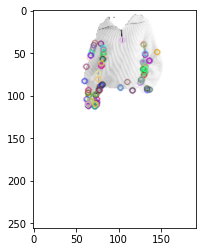

In [5]:
plt.imshow(img)
plt.show()

# Canny + Hough

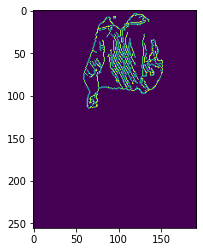

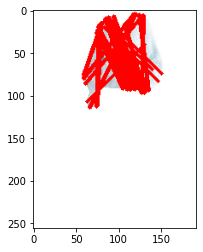

In [2]:
# Read image
img = cv2.imread('trg.png', cv2.IMREAD_COLOR) 

# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)
plt.imshow(edges)
plt.show()

# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 25, minLineLength=10, maxLineGap=250)

# Draw lines on the image
for line in lines:
	x1, y1, x2, y2 = line[0]
	cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Show result
plt.imshow(img)
plt.show()

# Keypoint setting

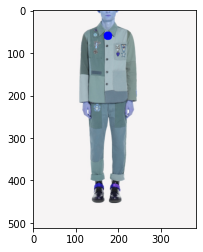

In [13]:
img = cv2.imread(os.path.join('dataset','upper_body','images','denim_denim-shirts','12141279ui_0_r.jpg')) 
img = cv2.resize(img, (384, 512))
img = cv2.circle(img, (175, 60), radius=10, color=(0, 0, 255), thickness=-1)


plt.imshow(img)
plt.show()

# SOBRL + 2*GrabCut

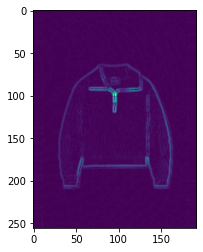

In [192]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

img = cv2.imread(r"dataset\upper_body\images\denim_denim-shirts\38814303li_1_f.jpg")
img = cv2.imread("dataset\\upper_body\\images\\denim_denim-shirts\\12176911ut_1_f.jpg")
img = cv2.imread("src.png")


# Output dtype = cv2.CV_8U
img = cv2.GaussianBlur(img, (3, 3), 0)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Display the image 
plt.imshow(grad)
plt.show()

In [193]:
#grad *= 2
rich = img.astype(np.int16) - grad[...,None]

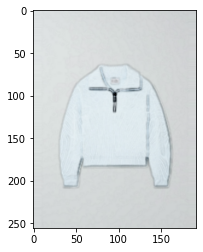

In [194]:
rich[rich<0] = 0
rich = rich.astype(np.uint8)
plt.imshow(rich)
#plt.imshow(img)

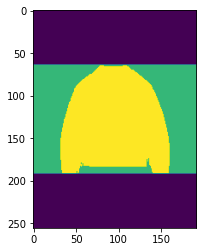

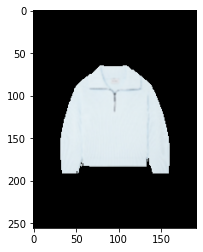

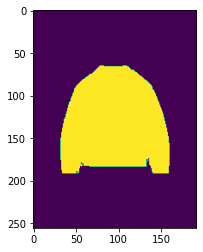

In [196]:
# Create 2 arrays for background and foreground model
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

D = rich.shape[0] // 2 # scrap image
rect = (0,D//2,rich.shape[1], rich.shape[0]-D)
mask, bgdModel, fgdModel = cv2.grabCut(rich, None, rect, bgdModel, fgdModel, 2, cv2.GC_INIT_WITH_RECT)

plt.imshow(mask)
plt.show()
# 0 -> surly BG is fake -> must be set to 2
# 1 -> nothing is surly FG
# 2 -> probably BG
# 3 -> probably FG

mask2 = np.where((mask==2)|(mask==0),2,3).astype('uint8')
#mask2 = np.where((mask==1),0,1).astype('uint8')
img_seg = img*(mask2[...,np.newaxis] == 3)

# Display the image 
plt.imshow(img_seg)
plt.show()

plt.imshow(mask2)
plt.show()


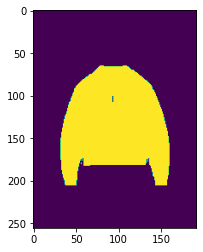

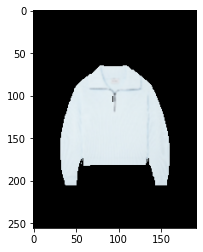

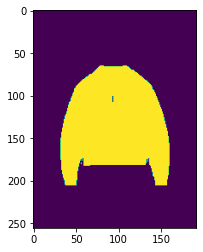

In [197]:
# Create 2 arrays for background and foreground model
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (5,5,grad.shape[1]-10, grad.shape[0]-10)
mask, bgdModel, fgdModel = cv2.grabCut(rich, mask2, None, bgdModel, fgdModel, 2, cv2.GC_INIT_WITH_MASK)

plt.imshow(mask)
plt.show()

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
#mask2 = np.where((mask==1),0,1).astype('uint8')
img_seg = img*mask2[:,:,np.newaxis]

# Display the image 
plt.imshow(img_seg)
plt.show()

plt.imshow(mask2==)
plt.show()

## old

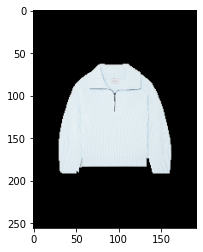

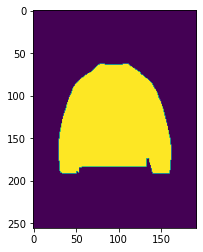

In [52]:
#img = cv2.imread("src.png")

# Create a 0's mask
mask = np.zeros(img.shape[:2],np.uint8)
mask = np.zeros(img.shape[:2],np.uint8)
# Create 2 arrays for background and foreground model
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (0,0,img.shape[0], img.shape[1])
#mask, bgdModel, fgdModel = cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 6, cv2.GC_INIT_WITH_RECT)
mask, bgdModel, fgdModel = cv2.grabCut(np.stack([grad,grad,grad],2), mask, rect, bgdModel, fgdModel, 6, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_seg = img*mask2[:,:,np.newaxis]

# Display the image 
plt.imshow(img_seg)

plt.show()
plt.imshow(mask2)
plt.show()

# Sobel preprocessing

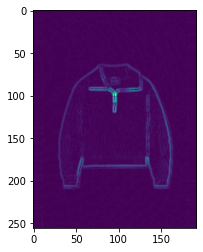

In [48]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

img = cv2.imread("src.png")

# Output dtype = cv2.CV_8U
img = cv2.GaussianBlur(img, (3, 3), 0)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Display the image 
plt.imshow(grad)
plt.show()

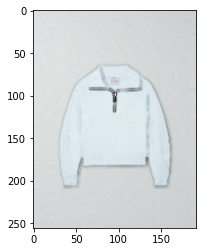

In [10]:
plt.imshow(img - grad[:,:, None])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


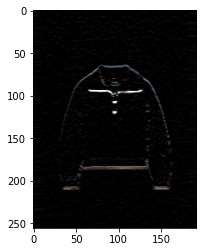

In [6]:
grad_y = cv2.Sobel(img - grad[:,:, None], ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
plt.imshow(grad_y)
plt.show()

# preprocessing by hand


In [24]:
img = img - grad[:,:, None]

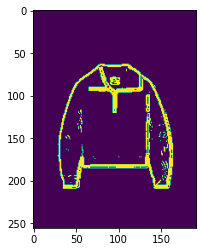

In [33]:
plt.imshow(grad)


#np.histogram(grad, 256)#.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


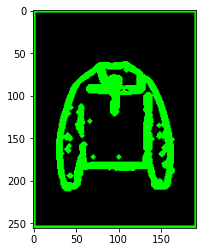

In [21]:
#img = cv2.imread("src.png")

#img = grad[:,:, None] #= img - grad[:,:, None]


img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 100
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), thickness=cv2.FILLED)
#cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)

plt.imshow(img_contours)
plt.show()

In [44]:
img = grad **2

In [40]:
grad.shape

(256, 192)

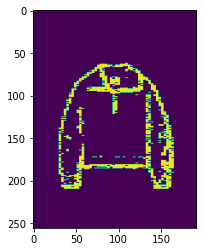

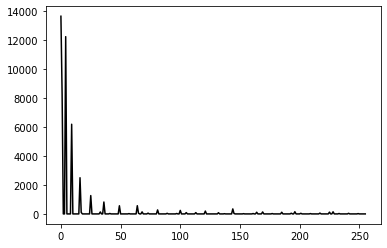

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-ttbyx0jz\opencv\modules\imgproc\src\drawing.cpp:2501: error: (-215:Assertion failed) npoints > 0 in function 'cv::drawContours'


In [47]:
#img = cv2.imread("src.png")
# img = cv2.imread("dataset\\upper_body\\images\\denim_denim-shirts\\12176911ut_1_f.jpg")

#img = cv2.resize(img, (192, 256))

#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=5

ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.imshow(result_image)
plt.show()

#plt.imshow(label.reshape((256,192,1)) == 0)
#plt.imshow(label.reshape((256,192)) == 0)
#plt.show()

histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(histogram, color='k')
plt.show()

cv2.drawContours(img, result_image, -1, (0,255,0), thickness=cv2.FILLED)
#cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)

plt.imshow(img)
plt.show()

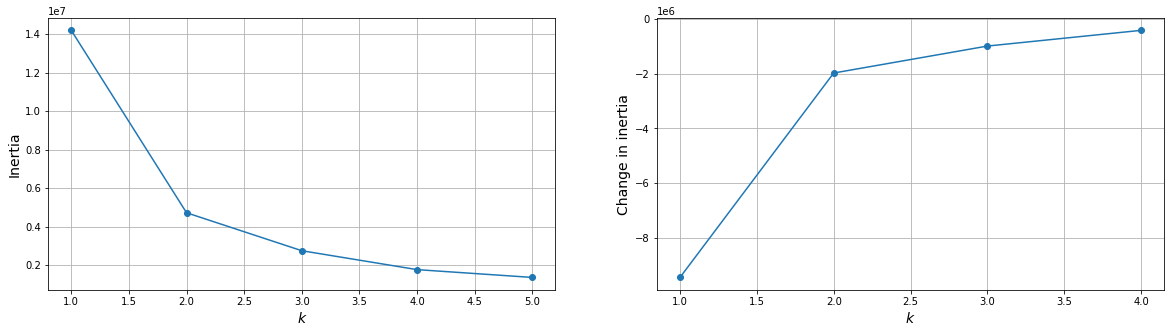

In [130]:
from sklearn.cluster import KMeans

# Try 2 to 30 clusters.
n_clusters = list(range(1, 6, 1))
kmeans = []
inertias = []

for i in range(len(n_clusters)):
    kmeans.append(KMeans(n_clusters = n_clusters[i], 
                         random_state = 42))
    kmeans[-1].fit(img.reshape(img.shape[0]*img.shape[1], 3))
    inertias.append(kmeans[-1].inertia_)
    
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
plt.plot(n_clusters, inertias, "-o")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Inertia", fontsize = 14)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(n_clusters[:-1], np.diff(inertias), "-o")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Change in inertia", fontsize = 14)
plt.grid(True)
plt.show()

In [134]:
vals = []
for i in range(len(inertias)):
    if i != 0:
        vals.append((inertias[i - 1] - inertias[i]))

print(vals)


[9464366.963018335, 1969701.0971584897, 980982.0800614157, 405295.34464819706]


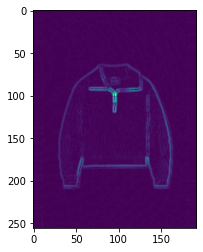

In [238]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

img = cv2.imread("src.png")

# Output dtype = cv2.CV_8U
img = cv2.GaussianBlur(img, (3, 3), 0)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Display the image 
plt.imshow(grad)
plt.show()

In [239]:
rich = img.astype(np.int16) - grad[...,None]
rich = rich.clip(0,255).mean(2).astype(np.uint8)

otsu_threshold, image_result = cv2.threshold(rich, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)

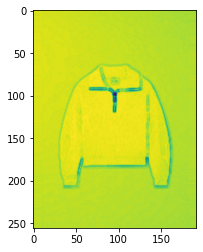

In [240]:
plt.imshow(rich)

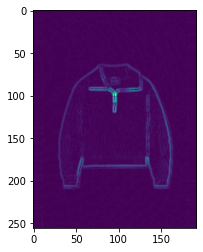

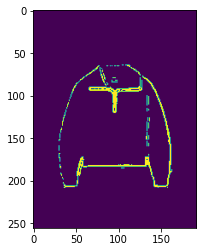

In [262]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=5

ret,label,center=cv2.kmeans((grad).flatten().astype(np.float32)[...,None],K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((grad.shape))

plt.imshow(grad)
plt.show()
plt.imshow(result_image)
plt.show()


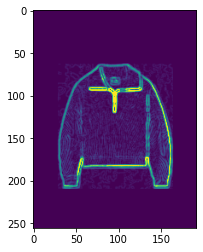

In [245]:
th = grad.copy()
val = 50
th[th > val] = val

th[th.max(1) < 10] = 0
th[:,th.max(0) < 10] = 0
plt.imshow(th)

# Propagation

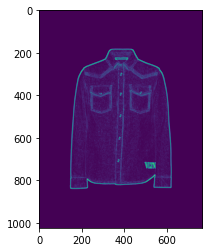

In [5]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

img = cv2.imread(r"dataset\upper_body\images\denim_denim-shirts\38814303li_1_f.jpg")
img = cv2.imread("src.png")
img = cv2.imread("dataset\\upper_body\\images\\denim_denim-shirts\\12176911ut_1_f.jpg")


# Output dtype = cv2.CV_8U
img = cv2.GaussianBlur(img, (3, 3), 0)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Display the image 
plt.imshow(grad)
plt.show()

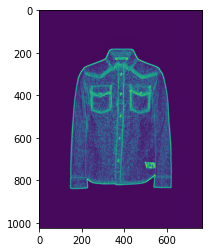

In [6]:
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
cl = clahe.apply(grad)
plt.imshow(cl)

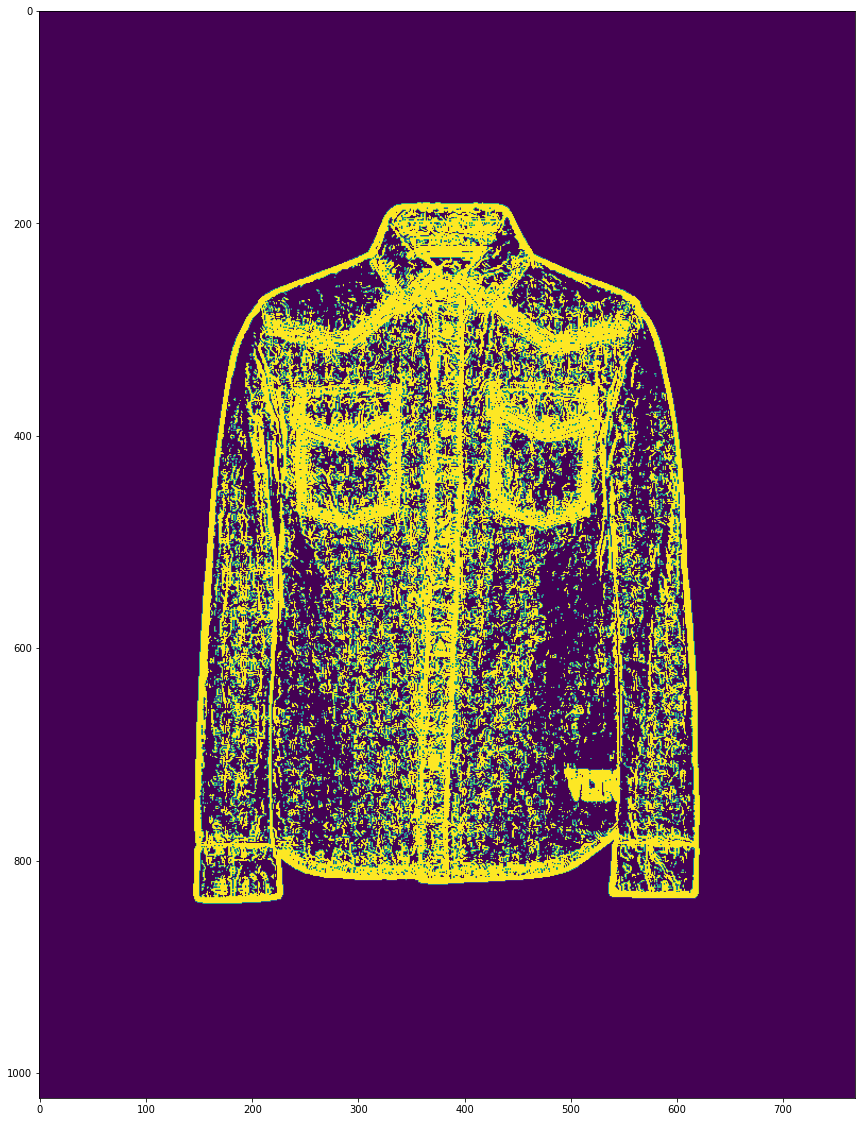

In [7]:
otsu_threshold, image_result = cv2.threshold(cl, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
plt.figure(figsize=(20,20))
plt.imshow(image_result)

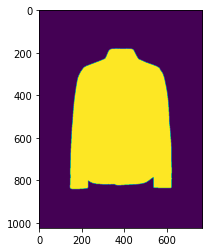

In [292]:
FG = np.ones_like(image_result)
for i in range(image_result.shape[0]):
    for j in range(image_result.shape[1]):
        if image_result[i,j] != 0:
            break
        else:
            FG[i,j] = 0

for i in range(image_result.shape[0]):
    for j in range(image_result.shape[1])[::-1]:
        if image_result[i,j] != 0:
            break
        else:
            FG[i,j] = 0

for j in range(image_result.shape[1]):
    for i in range(image_result.shape[0]):
        if image_result[i,j] != 0:
            break
        else:
            FG[i,j] = 0

for j in range(image_result.shape[1]):
    for i in range(image_result.shape[0])[::-1]:
        if image_result[i,j] != 0:
            break
        else:
            FG[i,j] = 0

plt.imshow(FG)

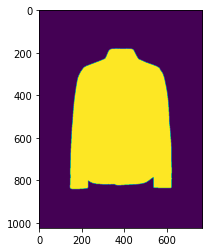

In [8]:
FG = np.ones_like(image_result)

BG = image_result.cumsum(0) == 0
FG[BG] = 0

BG = image_result[::-1].cumsum(0) == 0
FG[BG[::-1]] = 0

BG = image_result.cumsum(1) == 0
FG[BG] = 0

BG = image_result[:,::-1].cumsum(1) == 0
FG[BG[:,::-1]] = 0

plt.imshow(FG)

In [ ]:
FG = np.ones_like(image_result)
image_result.argmax(0)
for i in range(image_result.shape[0]):
    for j in range(image_result.shape[1]):
        if image_result[i,j] != 0:
            break
        else:
            FG[i,j] = 0

for i in range(image_result.shape[0]):
    for j in range(image_result.shape[1])[::-1]:
        if image_result[i,j] != 0:
            break
        else:
            FG[i,j] = 0

for j in range(image_result.shape[1]):
    for i in range(image_result.shape[0]):
        if image_result[i,j] != 0:
            break
        else:
            FG[i,j] = 0

for j in range(image_result.shape[1]):
    for i in range(image_result.shape[0])[::-1]:
        if image_result[i,j] != 0:
            break
        else:
            FG[i,j] = 0

plt.imshow(FG)

# Final function

In [2]:
def to_mask(img):
    scale = 1
    delta = 0
    ddepth = cv2.CV_16S

    # img = cv2.imread(r"dataset\upper_body\images\denim_denim-shirts\38814303li_1_f.jpg")
    # img = cv2.imread("src.png")
    # img = cv2.imread("dataset\\upper_body\\images\\denim_denim-shirts\\12176911ut_1_f.jpg")

    img = img.astype('uint8')
    # Output dtype = cv2.CV_8U
    img = cv2.GaussianBlur(img, (3, 3), 0)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
    grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)


    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)


    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
    cl = clahe.apply(grad)

    otsu_threshold, image_result = cv2.threshold(cl, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)

    FG = np.ones_like(image_result)

    BG = image_result.cumsum(0) == 0
    FG[BG] = 0

    BG = image_result[::-1].cumsum(0) == 0
    FG[BG[::-1]] = 0

    BG = image_result.cumsum(1) == 0
    FG[BG] = 0

    BG = image_result[:,::-1].cumsum(1) == 0
    FG[BG[:,::-1]] = 0

    return FG

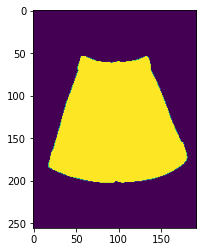

In [7]:
dataset = YooxDatasetPairs()
dataset[0] # get first data
dataset[0][2] # get only label
dataset[[0,1]] # get multiple data

mask = to_mask(dataset[0][0].transpose((1,2,0))* 255)
mask = mask.reshape((256,192,1))
plt.imshow(mask)